# Знания методов описательной статистики и способов визуализации данных крайне полезны для предварительного или эксплораторного анализа данных (exploratory data analysis, EDA). Любой серьёзный анализ данных начинается с ознакомления, первичного поиска закономерностей и выявления возможных ошибок - пренебрегать этим этапом не стоит.

## Ровно этим мы сейчас и займёмся, а заодно освежим в памяти знания Python из первого блока! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

### Задания Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить).
- Также изучите типы переменных. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year. 
- На каких платформах произошло больше всего релизов? 
- Игры каких издателей (Publisher) встречаются в датасете чаще всего?
- В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
- Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
- Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

### Описание данных
#### Имеются следующие поля:

- Rank – место по объему продаж
- Name – название игры
- Platform – платформа, на которой выпущена игра
- Year – год релиза
- Genre – жанр
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн.
- EU_Sales – продажи в Европе, в млн.
- JP_Sales – продажи в Японии, в млн.
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import os

print('Библиотеки загружены')

Библиотеки загружены


## Чтение файла и запись в датафрейм df

In [2]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-andrej-antoshkin-rsc7785/Statistika/Osnovniy_ponyatiya_statistiki/games.csv")

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.loc[:5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [5]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2204,2206,Mario Tennis Open,3DS,2012.0,Sports,Nintendo,0.26,0.29,0.33,0.05,0.94
4815,4817,Samurai Shodown,SNES,1994.0,Fighting,Takara,0.00,0.00,0.40,0.00,0.40
249,250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39
2781,2783,Tiger Woods PGA Tour 2001,PS2,2001.0,Sports,Electronic Arts,0.36,0.28,0.00,0.09,0.74
2831,2833,SD Gundam G Generation,PS,1998.0,Strategy,Namco Bandai Games,0.00,0.00,0.67,0.05,0.72


In [6]:
df.sample(frac=0.0005)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15399,15402,Motocross Mania 3,XB,2005.0,Racing,Take-Two Interactive,0.01,0.00,0.00,0.00,0.02
13836,13838,The Sims 4: Spa Day,PC,2015.0,Simulation,Electronic Arts,0.00,0.04,0.00,0.00,0.04
4920,4922,Need for Speed: Nitro,DS,2009.0,Racing,Electronic Arts,0.22,0.13,0.00,0.04,0.39
15264,15267,Shinken de Watashi ni Koi Shinasai! R,PS3,2012.0,Action,Minato Station,0.00,0.00,0.02,0.00,0.02
2600,2602,Guitar Hero: Aerosmith,PS2,2008.0,Misc,Activision,0.61,0.00,0.00,0.18,0.79
9679,9681,After Hours Athletes,PS3,2011.0,Sports,Sony Computer Entertainment,0.00,0.10,0.00,0.03,0.12
15550,15553,Motto NUGA-CEL!,PSP,2010.0,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
16549,16552,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01


В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета. Не забудьте сохранить результат удаления в переменную!

In [7]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [10]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [11]:
df.Year.mode()

0    2009.0
Name: Year, dtype: float64

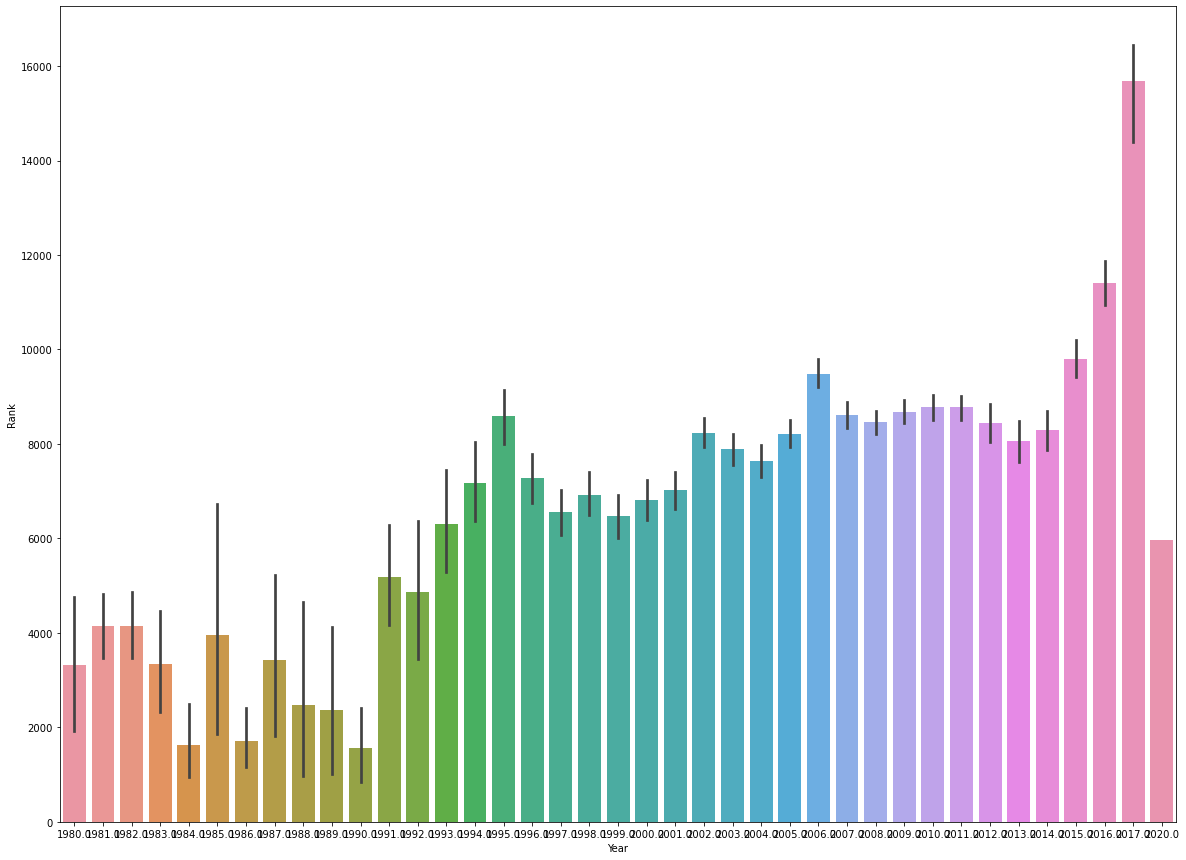

In [12]:
df.groupby('Year').agg({'Rank':'count'})

plt.figure(figsize=(20,15))

sns.barplot(x = "Year", y = 'Rank', data = df)

#sns.countplot(data=df, x='Year')

In [13]:
sorted(list(df.Year.unique()))

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [14]:
def union_year(year):
    if 1980 <= year <= 1985:
        return '80-85'
    elif 1986 <= year <= 1990:
        return '86-90'
    elif 1991 <= year <= 1995:
        return '91-95'
    elif 1996 <= year <= 2000:
        return '96-00'
    elif 2001 <= year <= 2005:
        return '01-05'
    elif 2006 <= year <= 2010:
        return '06-10'
    elif 2011 <= year <= 2015:
        return '11-15'
    elif 2016 <= year <= 2020:
        return '16-20'
    else:
        return 'other'   # На случай годов вне диапазонов

In [15]:
df['cluster_year'] = df['Year'].apply(union_year)

In [16]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cluster_year
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,06-10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80-85
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,06-10
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,06-10
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,96-00
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,01-05
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,01-05
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,06-10
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,06-10


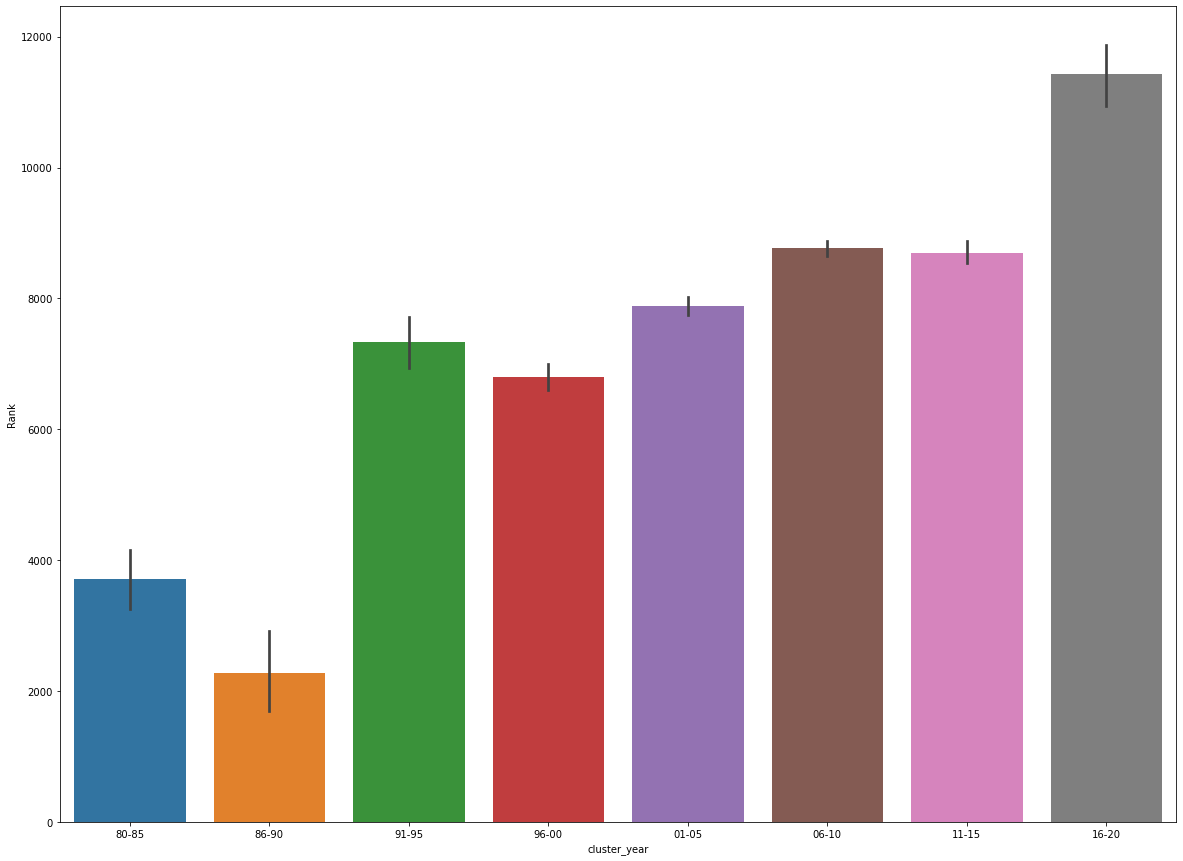

In [17]:
cluster_year_game = ['80-85', '86-90', '91-95', '96-00', 
                 '01-05', '06-10', '11-15', '16-20']

plt.figure(figsize=(20,15))

sns.barplot(x="cluster_year", y="Rank", data=df, 
            order=cluster_year_game)

In [18]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
cluster_year    0
dtype: int64

На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом

In [19]:
df.Platform.value_counts(normalize = True).mul(100)

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: Platform, dtype: float64

In [20]:
platforms = df.Platform.value_counts(normalize = True).mul(100).index.to_list()
platforms

['DS',
 'PS2',
 'PS3',
 'Wii',
 'X360',
 'PSP',
 'PS',
 'PC',
 'XB',
 'GBA',
 'GC',
 '3DS',
 'PSV',
 'PS4',
 'N64',
 'SNES',
 'XOne',
 'SAT',
 'WiiU',
 '2600',
 'NES',
 'GB',
 'DC',
 'GEN',
 'NG',
 'SCD',
 'WS',
 '3DO',
 'TG16',
 'GG',
 'PCFX']

In [21]:
pub = df.Publisher.value_counts()

In [22]:
pub

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
RED Entertainment                  1
Michaelsoft                        1
Media Entertainment                1
New World Computing                1
Genterprise                        1
Name: Publisher, Length: 576, dtype: int64

In [23]:
filtered_publishers = pub[pub > 100].reset_index()

In [24]:
filtered_publishers

,index,Publisher
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


In [25]:
filtered_publishers = pub[pub > 100].reset_index()
filtered_publishers.rename(columns={'index':'publisher', 'Publisher': 'count'})  # Переименовываем столбцы

,publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


In [26]:
filtered_publishers.max()

index        Zoo Digital Publishing
Publisher                      1339
dtype: object

Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA_sales, EU_sales, JP_sales, Other_sales). 

В каком регионе медианное значение объема продаж является наибольшим?

In [27]:
df_nintendo = df[df['Publisher'] == 'Nintendo'].copy()

In [28]:
df_nintendo.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


In [29]:
df_nintendo.EU_Sales.mode()

0    0.0
Name: EU_Sales, dtype: float64

In [30]:
df_nintendo.JP_Sales.mode()

0    0.0
Name: JP_Sales, dtype: float64

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

по оси x будет расположен жанр игры (Genre)
по оси у – объем продаж в Японии (JP_sales)
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

In [31]:
df_nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cluster_year
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,06-10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80-85
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,06-10
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,06-10
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,96-00
...,...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01,06-10
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,11-15
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,11-15
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01,06-10


Text(0.5, 1.0, 'продажи Nintendo в Японии по жанрам')

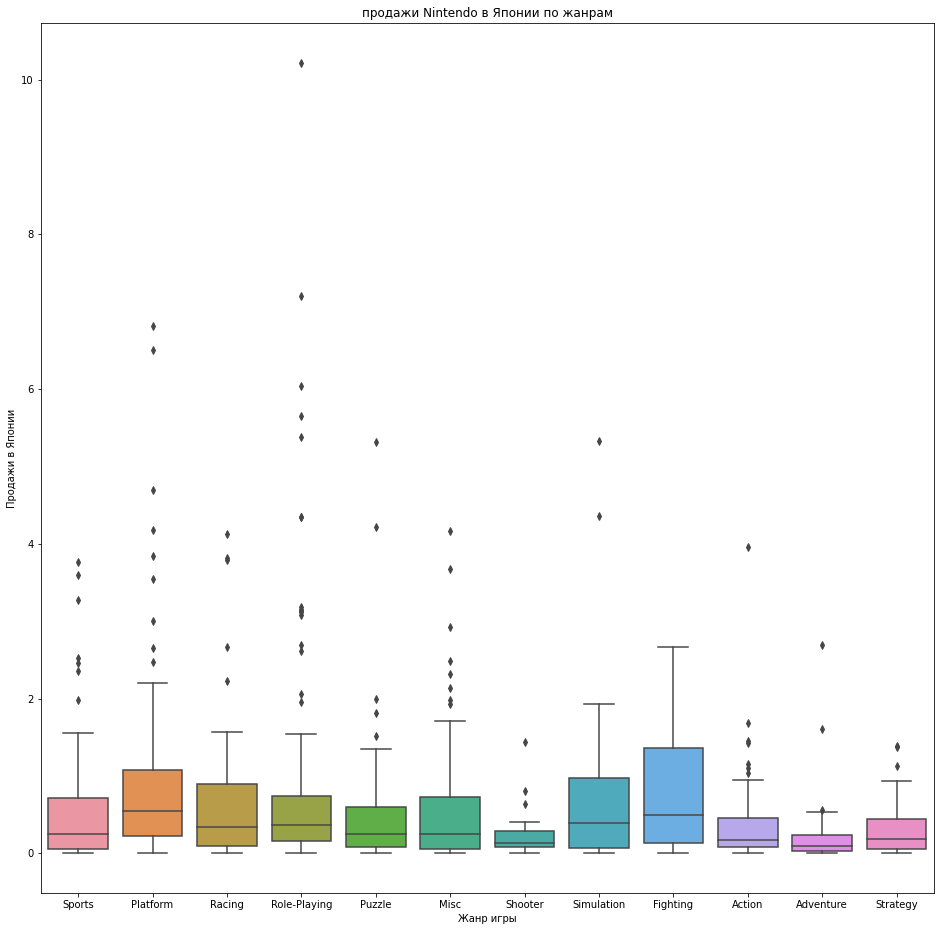

In [32]:
plt.figure(figsize=(16,16))

sns.boxplot(data=df_nintendo, x="Genre", y="JP_Sales")
plt.ylabel('Продажи в Японии')
plt.xlabel('Жанр игры')
plt.title('продажи Nintendo в Японии по жанрам')

In [33]:
df_nintendo.query('Genre == "Role-Playing"').max()

Rank                                14443
Name            Yokai Watch 2 Ganso/Honke
Platform                             WiiU
Year                               2015.0
Genre                        Role-Playing
Publisher                        Nintendo
NA_Sales                            11.27
EU_Sales                             8.89
JP_Sales                            10.22
Other_Sales                          1.37
Global_Sales                        31.37
cluster_year                        96-00
dtype: object

In [34]:
df_nintendo.query('Genre == "Role-Playing"')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cluster_year
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,96-00
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,96-00
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,06-10
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,01-05
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,06-10
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,11118,Kurikin: Nano Island Story,DS,2007.0,Role-Playing,Nintendo,0.00,0.00,0.09,0.00,0.09,06-10
11881,11883,Mega Man Battle Network 5: Double Team DS (US ...,DS,2005.0,Role-Playing,Nintendo,0.07,0.00,0.00,0.00,0.07,01-05
13947,13949,Magical Starsign (JP sales),DS,2006.0,Role-Playing,Nintendo,0.00,0.00,0.04,0.00,0.04,06-10
14376,14379,Eyeshield 21: Field Saikyou no Senshi Tachi,Wii,2007.0,Role-Playing,Nintendo,0.00,0.00,0.03,0.00,0.03,06-10


In [35]:
df_role_playing = df_nintendo.query('Genre == "Role-Playing"')
max_index = df_role_playing['Global_Sales'].idxmax()

# Получаем всю строку по индексу
max_row = df_role_playing.loc[max_index]

max_row

Rank                                   5
Name            Pokemon Red/Pokemon Blue
Platform                              GB
Year                              1996.0
Genre                       Role-Playing
Publisher                       Nintendo
NA_Sales                           11.27
EU_Sales                            8.89
JP_Sales                           10.22
Other_Sales                          1.0
Global_Sales                       31.37
cluster_year                       96-00
Name: 4, dtype: object

In [36]:
max_row = df_nintendo.query('Genre == "Role-Playing"').loc[lambda x: df_nintendo['JP_Sales'] == df_nintendo['JP_Sales'].max()]
max_row

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cluster_year
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,96-00


Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [37]:
df_nintendo = df_nintendo.query('Genre == "Fighting" or Genre == "Simulation" or Genre == "Platform" or Genre == "Racing" or Genre == "Sports"')

In [38]:
genre_group_sales = df_nintendo.groupby(['Genre', 'Year'], as_index = False) \
                            .agg({'Global_Sales':'sum'}) \
                            .sort_values('Global_Sales', ascending=False)

In [39]:
genre_group_sales

,Genre,Year,Global_Sales
105,Sports,2006.0,84.62
108,Sports,2009.0,56.67
15,Platform,1985.0,43.17
74,Simulation,2005.0,37.46
63,Racing,2008.0,35.82
...,...,...,...
101,Sports,2002.0,0.25
12,Fighting,2012.0,0.20
97,Sports,1997.0,0.17
73,Simulation,2002.0,0.14


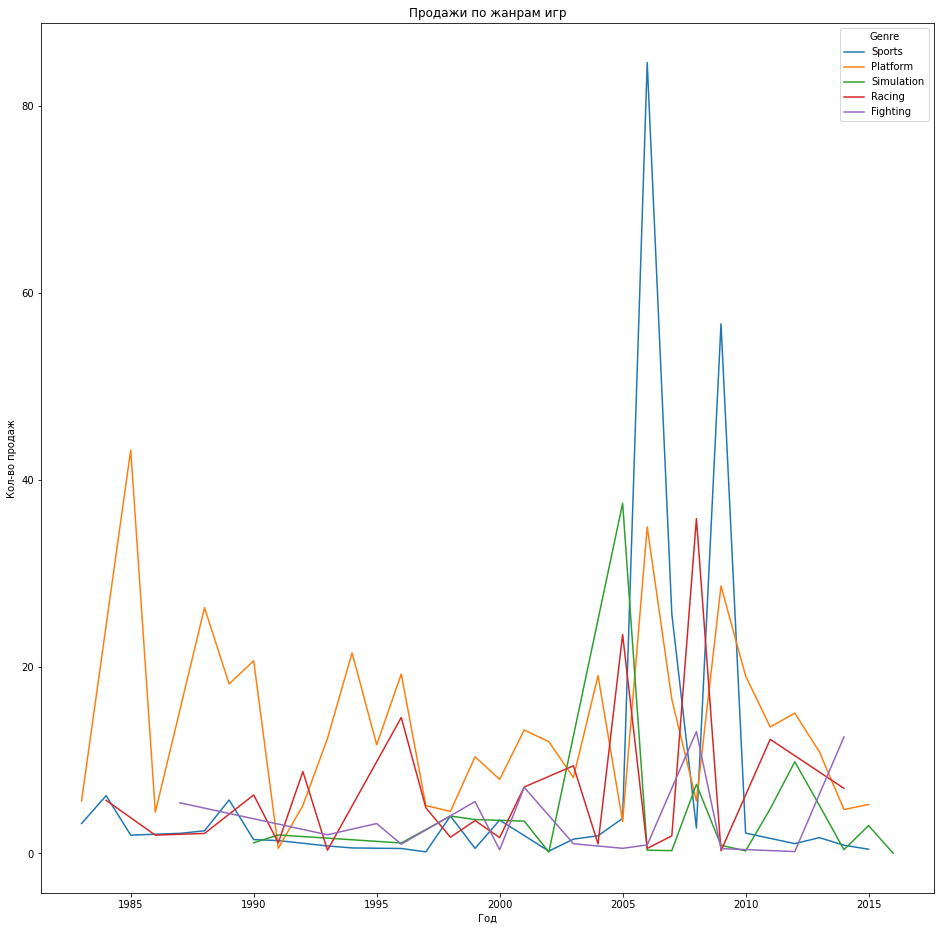

In [43]:
plt.figure(figsize=(16,16))

sns.lineplot(data=genre_group_sales, x='Year', y='Global_Sales', hue='Genre')
plt.title("Продажи по жанрам игр")
plt.ylabel("Кол-во продаж")
plt.xlabel("Год")
plt.show()